In [0]:
import torch
import numpy as np
import torch.nn as nn # Modulo de redes neuronales, necesitamos relacion linel de este modulo
import torch.optim as optim # Modulo de optimizacion que trae optimizacion necesario para traer gradientes y aplicar backpropagation

import matplotlib.pyplot as plt


# Regresion Lineal

---



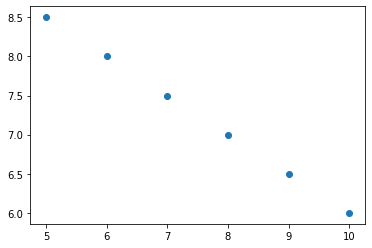

In [5]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [10]:
# cambiar formato del arreglo nos sirve para enviarlo a pytorch como tensor
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)
units_array

array([[8.5],
       [8. ],
       [7.5],
       [7. ],
       [6.5],
       [6. ]])

In [14]:
# forzados la conversion a gradiente en float y convertirlo de forma que para crear modelo necesito gradiente
# solo prices lleva gradiente
# units es el target asi que no necesito gradiente
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()
prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

In [0]:
#defino modelo
model = nn.Linear(1, 1) # Recibe el tamano de entrada y de salida 1 de entrada y salida

#defino funcion de perdida con media de los cuadrados de los errores
loss_function = nn.MSELoss()

# Defino el optimizador SGD stochastic gradient descent
# trabajamos ocn un batch de datos para calcular el gradiente
# paso parametros, defino lr (learning rate)
optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
preds = []
iterations = 2000

for i in range(iterations):
  #forward pass
  pred = model(prices)
  loss = loss_function(pred, units)
  preds.append(pred.data)
  losses.append(loss.data)

  #Reinicio gradientes, pytorch acumula, necesitamos por cada iteracion reiniciar
  optimizer.zero_grad()
  # back propagation
  loss.backward()
  # Hacemos un step en base a los gradientes obtenidos me muevo un poco
  # en direccion del minimo
  optimizer.step()

print(pred)
print(float(loss))
plt.plot(range(iterations), losses)

In [35]:
# con lo anterior el modelo ya esta entrenado
# x es el precio
# por lo que calculamos la cantidad de unidades vendidas correspondiente
# Le pasamos al modelo el precio
x = torch.Tensor([[20.0]])
p = model(x)
p

tensor([[1.9895]], grad_fn=<AddmmBackward>)